# How to handle Outliers in the data?

What exactly is an outlier? An outlier is an observation that lies an abnormal distance from other values in a random sample from a<br> population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered<br> abnormal.


It's best to remove outliers only when you have a sound reason for doing so. Some outliers represent natural variations in the<br> population, and they should be left as is in your dataset. These are called true outliers.

Other outliers are problematic and should be removed because they represent measurement errors, data entry or processing errors, or<br> poor sampling.

Outliers can have a big impact on your statistical analyses and skew the results of any hypothesis test if they are inaccurate.<br>
These extreme values can impact your statistical power as well, making it hard to detect a true effect if there is one.

Outlier detection is a method used to find unusual or abnormal data points in a set of information. Imagine you have a group of friends, and you're all about the same age, but one person is much older or younger than the rest. That person would be considered an outlier because they stand out from the usual pattern.

You can choose from four main ways to detect outliers:

- Sorting your values from low to high and checking minimum and maximum values
- Visualizing your data with a box plot and looking for outliers
- Using the interquartile range to create fences for your data
- Using statistical procedures to identify extreme values

You can choose from several methods to detect outliers depending on your time and resources.

Let's explore one by one!

## 1. Sorting method:

You can sort quantitative variables from low to high and scan for extremely low or extremely high values. Flag any extreme values<br> that you find.

This is a simple way to check whether you need to investigate certain data points before using more sophisticated methods.

For e.g:

Your dataset for a pilot experiment consists of 8 values.

In [115]:
# 180 156 9 176	163	1827 166 171

You sort the values from low to high and scan for extreme values.

In [116]:
# 9	156	163	166	171	176	180	1872

## 2. Using visualizations

You can use software to visualize your data with a box plot, or a box-and-whisker plot, so you can see the data distribution at a<br> glance. This type of chart highlights minimum and maximum values (the range), the median, and the interquartile range for your<br> data.

Many computer programs highlight an outlier on a chart with an asterisk, and these will lie outside the bounds of the graph.

/var/folders/d0/ymvkftpj5hzdbp0bfg1vxwvr0000gn/T/ipykernel_3515/156954294.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot2 = sns.distplot(normal, ax=axs[1])


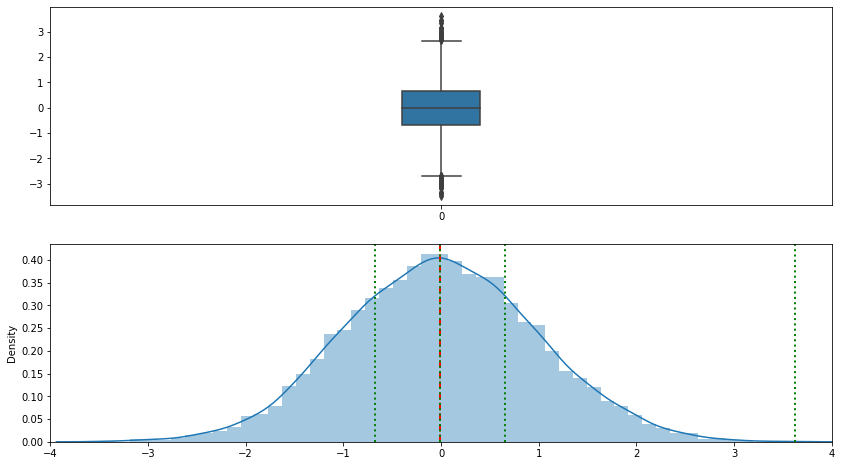

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

normal = np.random.normal(0, 1, 10000) # loc, scale, size, creating random dataset which follow normal distribution
quartiles = pd.DataFrame(normal).quantile([0.25, 0.5, 0.75, 1])[0]
fig, axs = plt.subplots(nrows=2)
fig.set_size_inches(14, 8)
# Boxplot of Normal distribution
plot1 = sns.boxplot(normal, ax=axs[0])
plot1.set(xlim=(-4, 4))
# Normal distribution
plot2 = sns.distplot(normal, ax=axs[1])
plot2.set(xlim=(-4, 4))
# Median line
plt.axvline(np.median(normal), color='r', linestyle='dashed', linewidth=2)
for i, q in enumerate(quartiles):
    # Quartile i line
    plt.axvline(q, color='g', linestyle='dotted', linewidth=2)

### Outliers: drop them or not

Most parametric statistics, like means, standard deviations, and correlations, and every statistic based on these, are highly<br> sensitive to outliers. Despite this, it is not acceptable to drop an observation just because it is an outlier. They can be<br> legitimate observations and it’s important to investigate the nature of the outlier before deciding whether to drop it or not.

- DROP: If it is obvious that the outlier is due to incorrectly entered or measured data, you should drop the outlier.

For example a ```year``` field with a ```'9999'``` value.

- DROP: If the outlier does not change the results but does affect assumptions, you may drop the outlier. But note that in a<br> footnote of your paper.

For e.g; Neither the presence nor absence of the outlier in the graph below would change the regression line:

<img src="./images/regression.png" width="400"/>

- DROP AND EXPLAIN WHY: More commonly, the outlier affects both results and assumptions. In this situation, it is not legitimate to<br> simply drop the outlier. You may run the analysis both with and without it, but you should state in at least a footnote the dropping<br> of any such data points and how the results changed.

<img src="./images/regression1.png" width="400"/>

- DROP: If the outlier creates a significant association, you should drop it and should not report any significance from your<br> analysis.

In the following graph, the relationship between X and Y is clearly created by the outlier. Without it, there is no relationship<br> between X and Y, so the regression coefficient does not truly describe the effect of X on Y.

<img src="./images/regression2.png" width="400"/>

### What to do when we shouldn’t drop the outlier?

- Transformation: you can apply square root or log transformations, that will pull in high numbers.

This can make assumptions work better if the outlier is a dependent variable and can reduce the impact of a single point if the<br> outlier is an independent variable.

- Try a different model: This should be done with caution, but it may be that a non-linear model fits better.

For example, in the above example, perhaps an exponential curve fits the data with the outlier intact.

Whichever approach you take, you need to know your data and your research area well. Try different approaches, and see which make<br> theoretical sense.

### Removing outliers


Now that we know how to build a boxplot and visualize outliers (points outside whiskers), lets remove them:

<AxesSubplot: >

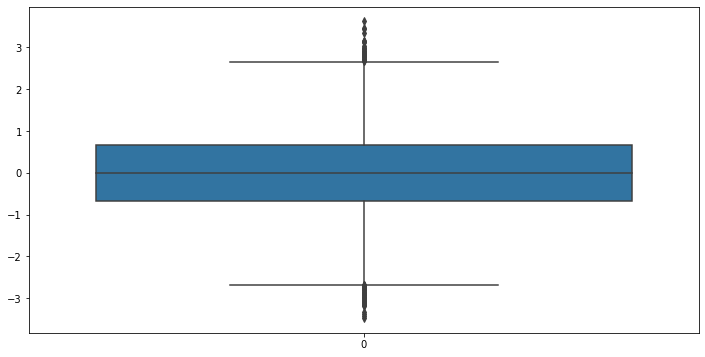

In [118]:
plt.figure(figsize=(12,6))
sns.boxplot(normal)

Boxplot show us many outliers, but are they wrong values?

We can manually remove values below/above a certain value:

<AxesSubplot: >

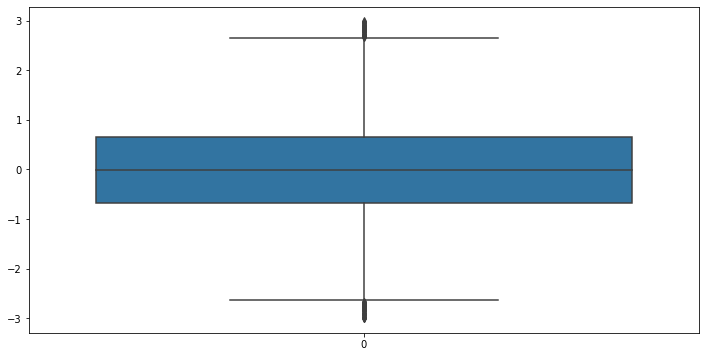

In [119]:
normal[(normal >= -3) & (normal <= 3)]

plt.figure(figsize=(12,6))
sns.boxplot(normal[(normal >= -3) & (normal <= 3)])

## 3. Using the interquartile range


Or use low and high fences of the boxplot and remove outer elements:



In [120]:
q1 = pd.DataFrame(normal).quantile(0.25)[0]
q3 = pd.DataFrame(normal).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range
fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

# "Outside" boxplot Reviews
normal[(normal < fence_low) | (normal > fence_high)].shape[0]

66

Keep just the “inside” boxplot points:

<AxesSubplot: >

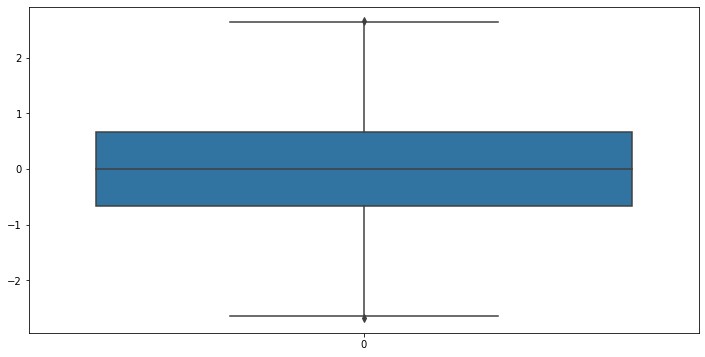

In [121]:
plt.figure(figsize=(12,6))
sns.boxplot(normal[(normal >= fence_low) & (normal <= fence_high)])

## 4. Statistical outlier detection

Statistical outlier detection involves applying statistical tests or procedures to identify extreme values.

You can convert extreme data points into ```z scores``` that tell you how many standard deviations away they are from the mean.

Z score is an important concept in statistics. Z score is also called standard score. This score helps to understand if a data<br> value is greater or smaller than mean and how far away it is from the mean. More specifically, Z score tells how many standard<br> deviations away a data point is from the mean.



If a value has a high enough or low enough z score, it can be considered an outlier. As a rule of thumb, values with a z score<br> greater than 3 or less than –3 are often determined to be outliers.

```Z score = (x -mean) / std. deviation```

Z-scores tend to be used mainly in the context of the normal curve, and their interpretation based on the standard normal table. It<br> would be erroneous to conclude, however, that Z-scores are limited to distributions that approximate the normal curve

A normal distribution is shown below and it is estimated that 68% of the data points lie between +/- 1 standard deviation. 95% of<br> the data points lie between +/- 2 standard deviation 99.7% of the data points lie between +/- 3 standard deviation

<img src="./images/normal.png" width="400"/>

### Z score and Outliers:

Let us use calculate the Z score using Python to find this outlier.

In [122]:
# Import necessary libraries
import numpy as np 
# Calculate mean, standard deviation
data = [1, 2, 2, 2, 3, 1, 1, 15, 2, 2, 2, 3, 1, 1, 2]
mean = np.mean(data)
std = np.std(data)
print('mean of the dataset is', mean)
print('std. deviation is', std)


mean of the dataset is 2.6666666666666665
std. deviation is 3.3598941782277745


In [123]:
# Calculate Z score. If Z score>3, print it as an outlier.
threshold = 3
outlier = []
for i in data:
	z = (i-mean)/std
	if z > threshold:
		outlier.append(i)
print('outlier in dataset is', outlier)


outlier in dataset is [15]


See [here](https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/) for more methods!